In [1]:
import pandas as pd
from urllib.request import urlopen, Request
import json
import folium
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib import pyplot
import folium
import folium.plugins as plugins
import folium
import folium.plugins as plugins

In [2]:
request=Request('https://public.opendatasoft.com/api/records/1.0/search/?dataset=significant-volcanic-eruption-database&q=&rows=10000&facet=year&facet=name&facet=location&facet=country&facet=type&facet=status&facet=deaths_description&facet=missing_description&facet=injuries_description&facet=damage_description&facet=houses_destroyed_description&facet=total_deaths_description&facet=total_missing_description&facet=total_injuries_description&facet=total_damage_description&facet=total_houses_destroyed_description&facet=houses_damaged_description')
response = urlopen(request)
elevations = response.read()
data = json.loads(elevations)
tmp_df = pd.json_normalize(data['records'])

In [3]:
df = tmp_df
df

,datasetid,recordid,record_timestamp,fields.status,fields.elevation,fields.name,fields.country,fields.coordinates,fields.location,fields.year,...,fields.total_houses_destroyed,fields.houses_destroyed,fields.injuries,fields.total_injuries,fields.total_missing_description,fields.total_missing,fields.missing,fields.missing_description,fields.damage_millions_dollars,fields.total_damage_millions_dollars
0,significant-volcanic-eruption-database,34bc07b899fd7bbffc8bb555442d35e35e259b9b,2020-08-27T13:34:26.911000+00:00,Historical,2507,Veniaminof,United States,"[56.17, -159.38]",Alaska Peninsula,-1750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,significant-volcanic-eruption-database,aa2a5d6073f6c5f687041ef1f8b0fb43540c48da,2020-08-27T13:34:26.911000+00:00,Radiocarbon,5005,Bona-Churchill,United States,"[61.38, -141.75]",Alaska-E,847,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,significant-volcanic-eruption-database,6f303f2a10474640693885275ecf62d131d7194e,2020-08-27T13:34:26.911000+00:00,Historical,2280,Ceboruco,Mexico,"[21.125, -104.508]",Mexico,930,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,significant-volcanic-eruption-database,f386254cb11427c4a9b8d601ef736c68fa1e6588,2020-08-27T13:34:26.911000+00:00,Historical,1491,Hekla,Iceland,"[63.98, -19.7]",Iceland-S,1158,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,significant-volcanic-eruption-database,327dd6ef63f5105926c2be19f1402659cc643990,2020-08-27T13:34:26.911000+00:00,Historical,3350,Etna,Italy,"[37.734, 15.004]",Italy,1329,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,significant-volcanic-eruption-database,d3ad9471eabb085b0922d5ab4e4dd384009ccca0,2020-08-27T13:34:26.911000+00:00,Historical,1784,Karangetang [Api Siau],Indonesia,"[2.78, 125.48]",Sangihe Is-Indonesia,2010,...,NaN,NaN,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
831,significant-volcanic-eruption-database,0c9d7962a50b61eb9f18f26aabdca4e14400bdcf,2020-08-27T13:34:26.911000+00:00,Historical,1222,Kilauea,United States,"[19.425, -155.292]",Hawaiian Is,2014,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,14.5,14.5
832,significant-volcanic-eruption-database,06a7e107e429f4a46b227af7f73673c4d197aa70,2020-08-27T13:34:26.911000+00:00,Holocene,2460,Sinabung,Indonesia,"[3.17, 98.392]",Sumatra,2016,...,NaN,3,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
833,significant-volcanic-eruption-database,d7c25d83ff982bcf76d3f30c819bf093792570ec,2020-08-27T13:34:26.911000+00:00,Historical,1807,Manam,Papua New Guinea,"[-4.1, 145.061]",New Guinea-NE of,2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
del df['datasetid']
del df['recordid']
del df['record_timestamp']
del df['fields.vei']
del df['geometry.type']
del df['geometry.coordinates']
del df['fields.tsu']
del df['fields.eq']


for col in df.columns:
    df.rename(columns = {col:col.split(".")[1]}, inplace = True)
    if "total" in col:
        del df[col.split(".")[1]]

In [5]:
df = df.dropna(subset = ['year', 'month', 'day'])
df["date"] = [str(df['day'][i])+'-'+str(df['month'][i])+'-'+str(df['year'][i]) for i in df.index]
df

<ipython-input-5-c43e9b437182>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = [str(df['day'][i])+'-'+str(df['month'][i])+'-'+str(df['year'][i]) for i in df.index]


,status,elevation,name,country,coordinates,location,year,type,damage_description,month,...,deaths_description,houses_destroyed_description,deaths,injuries_description,houses_destroyed,injuries,missing,missing_description,damage_millions_dollars,date
3,Historical,1491,Hekla,Iceland,"[63.98, -19.7]",Iceland-S,1158,Stratovolcano,LIMITED (roughly corresponding to less than $1...,01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19-01-1158
5,Historical,1491,Hekla,Iceland,"[63.98, -19.7]",Iceland-S,1510,Stratovolcano,NaN,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15-10-1510
8,Historical,1357,Makian,Indonesia,"[0.32, 127.4]",Halmahera-Indonesia,1646,Stratovolcano,NaN,07,...,Many (~101 to 1000 deaths),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19-07-1646
9,Historical,2426,La Palma,Spain,"[28.58, -17.83]",Canary Is,1677,Stratovolcano,NaN,11,...,Few (~1 to 50 deaths),NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,22-11-1677
12,Historical,640,Banda Api,Pacific Ocean,"[-4.525, 129.871]",Banda Sea,1820,Caldera,NaN,06,...,Few (~1 to 50 deaths),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11-06-1820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,Historical,1784,Karangetang [Api Siau],Indonesia,"[2.78, 125.48]",Sangihe Is-Indonesia,2010,Stratovolcano,NaN,08,...,Few (~1 to 50 deaths),Few (~1 to 50 houses),4.0,Few (~1 to 50 deaths),NaN,5.0,NaN,NaN,NaN,06-08-2010
831,Historical,1222,Kilauea,United States,"[19.425, -155.292]",Hawaiian Is,2014,Shield volcano,SEVERE (~>$5 to $24 million),11,...,NaN,Few (~1 to 50 houses),NaN,NaN,1,NaN,NaN,NaN,14.5,10-11-2014
832,Holocene,2460,Sinabung,Indonesia,"[3.17, 98.392]",Sumatra,2016,Stratovolcano,LIMITED (roughly corresponding to less than $1...,05,...,Few (~1 to 50 deaths),Few (~1 to 50 houses),1.0,Few (~1 to 50 deaths),3,4.0,NaN,NaN,NaN,09-05-2016
833,Historical,1807,Manam,Papua New Guinea,"[-4.1, 145.061]",New Guinea-NE of,2019,Stratovolcano,LIMITED (roughly corresponding to less than $1...,01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07-01-2019


In [6]:
df = df.fillna(0)

In [7]:
data_dict = {'LIMITED (roughly corresponding to less than $1 million)': 1,
 0: 0,
 'MODERATE (~$1 to $5 million)': 2,
 'SEVERE (~>$5 to $24 million)': 3,
 'EXTREME (~$25 million or more)': 4}
df["damage_description"] = [data_dict[df['damage_description'][i]] for i in df.index]
df["damage_description"]

3      1
5      0
8      0
9      0
12     0
      ..
830    0
831    3
832    1
833    1
834    2
Name: damage_description, Length: 647, dtype: int64

In [8]:
data_dict = {0: 0,
 'Many (~101 to 1000 deaths)': 3,
 'Few (~1 to 50 deaths)': 1,
 'Some (~51 to 100 deaths)': 2,
 'Very Many (~1001 or more deaths)': 4}
df["deaths_description"] = [data_dict[df['deaths_description'][i]] for i in df.index]
df["deaths_description"]

3      0
5      0
8      3
9      1
12     1
      ..
830    1
831    0
832    1
833    0
834    0
Name: deaths_description, Length: 647, dtype: int64

In [9]:
data_dict = {0: 0,
 'Some (~51 to 100 houses)': 2,
 'Few (~1 to 50 houses)': 1,
 'Very Many (~1001 or more houses)': 3,
 'Many (~101 to 1000 houses)': 4}
df["houses_destroyed_description"] = [data_dict[df['houses_destroyed_description'][i]] for i in df.index]
df["houses_destroyed_description"]

3      0
5      0
8      0
9      0
12     0
      ..
830    1
831    1
832    1
833    0
834    0
Name: houses_destroyed_description, Length: 647, dtype: int64

In [10]:
data_dict = {0: 0,
 'Some (~51 to 100 deaths)': 2,
 'Many (~101 to 1000 deaths)': 3,
 'Few (~1 to 50 deaths)': 1,
 'Very Many (~1001 or more deaths)': 4}
df["injuries_description"] = [data_dict[df['injuries_description'][i]] for i in df.index]
df["injuries_description"]

3      0
5      0
8      0
9      0
12     0
      ..
830    1
831    0
832    1
833    0
834    0
Name: injuries_description, Length: 647, dtype: int64

In [11]:
data_dict = {0: 0,
 'Many (~101 to 1000 deaths)': 3,
 'Some (~51 to 100 deaths)': 2,
 'Very Many (~1001 or more deaths)': 4,
 'Few (~1 to 50 deaths)': 1}
df["missing_description"] = [data_dict[df['missing_description'][i]] for i in df.index]
df["missing_description"]

3      0
5      0
8      0
9      0
12     0
      ..
830    0
831    0
832    0
833    0
834    0
Name: missing_description, Length: 647, dtype: int64

In [12]:
df["lat"] = [i[0] for i in df["coordinates"]]
df["long"] = [i[1] for i in df["coordinates"]]
del df['coordinates']

In [13]:
df

,status,elevation,name,country,location,year,type,damage_description,month,day,...,deaths,injuries_description,houses_destroyed,injuries,missing,missing_description,damage_millions_dollars,date,lat,long
3,Historical,1491,Hekla,Iceland,Iceland-S,1158,Stratovolcano,1,01,19,...,0.0,0,0,0.0,0.0,0,0.0,19-01-1158,63.980,-19.700
5,Historical,1491,Hekla,Iceland,Iceland-S,1510,Stratovolcano,0,10,15,...,0.0,0,0,0.0,0.0,0,0.0,15-10-1510,63.980,-19.700
8,Historical,1357,Makian,Indonesia,Halmahera-Indonesia,1646,Stratovolcano,0,07,19,...,0.0,0,0,0.0,0.0,0,0.0,19-07-1646,0.320,127.400
9,Historical,2426,La Palma,Spain,Canary Is,1677,Stratovolcano,0,11,22,...,1.0,0,0,0.0,0.0,0,0.0,22-11-1677,28.580,-17.830
12,Historical,640,Banda Api,Pacific Ocean,Banda Sea,1820,Caldera,0,06,11,...,0.0,0,0,0.0,0.0,0,0.0,11-06-1820,-4.525,129.871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,Historical,1784,Karangetang [Api Siau],Indonesia,Sangihe Is-Indonesia,2010,Stratovolcano,0,08,06,...,4.0,1,0,5.0,0.0,0,0.0,06-08-2010,2.780,125.480
831,Historical,1222,Kilauea,United States,Hawaiian Is,2014,Shield volcano,3,11,10,...,0.0,0,1,0.0,0.0,0,14.5,10-11-2014,19.425,-155.292
832,Holocene,2460,Sinabung,Indonesia,Sumatra,2016,Stratovolcano,1,05,09,...,1.0,1,3,4.0,0.0,0,0.0,09-05-2016,3.170,98.392
833,Historical,1807,Manam,Papua New Guinea,New Guinea-NE of,2019,Stratovolcano,1,01,07,...,0.0,0,0,0.0,0.0,0,0.0,07-01-2019,-4.100,145.061


In [14]:
df = df.reset_index()

In [15]:
df.to_csv("volcano_data.csv")

In [16]:
df = pd.read_csv('volcano_data.csv')

<AxesSubplot:title={'center':'deaths_description value hist'}, xlabel='deaths_description', ylabel='amount of eruptions'>

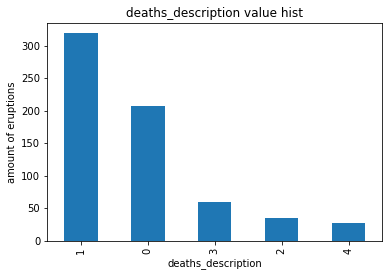

In [17]:
df['deaths_description'].value_counts().plot(kind='bar', title='deaths_description value hist', xlabel="deaths_description", ylabel="amount of eruptions")

<AxesSubplot:title={'center':'country value hist'}, xlabel='country', ylabel='amount of eruptions'>

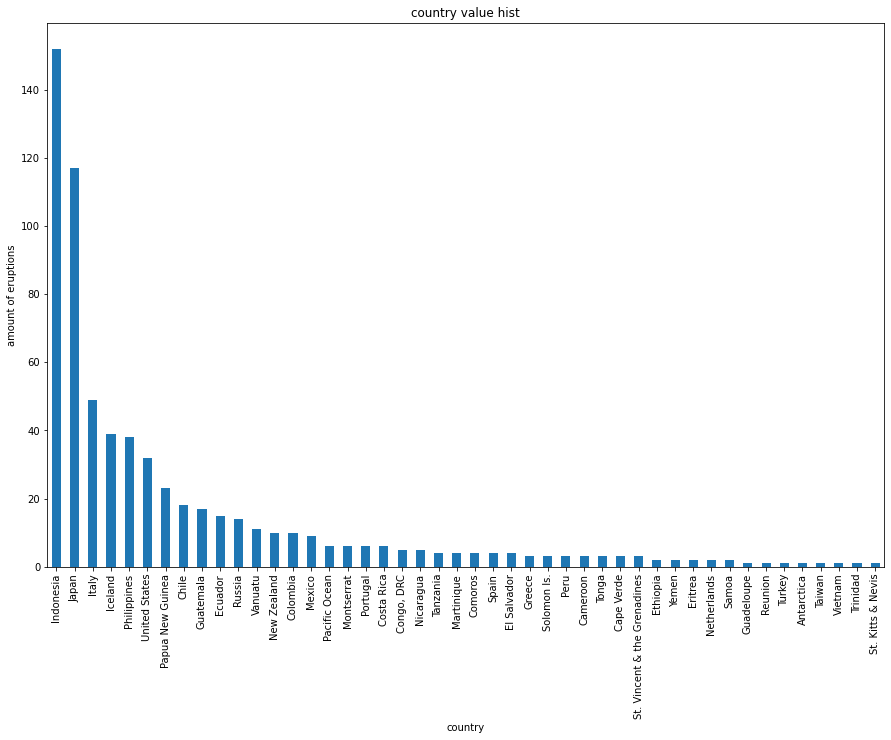

In [18]:
df['country'].value_counts().plot(kind='bar', title='country value hist', xlabel="country", ylabel="amount of eruptions", figsize=(15, 10))

<AxesSubplot:title={'center':'type value hist'}, xlabel='type', ylabel='amount of eruptions'>

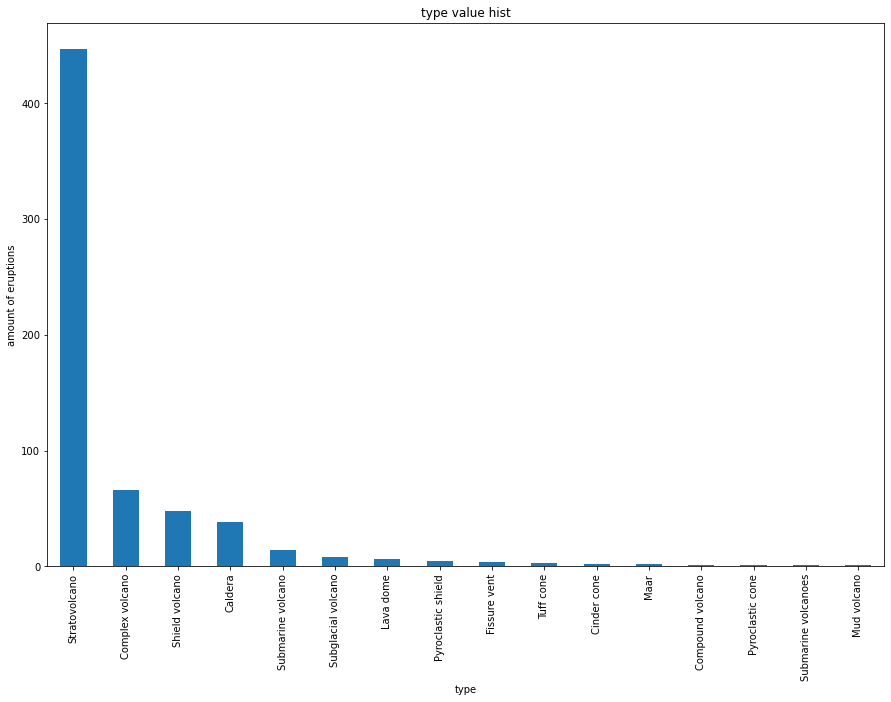

In [19]:
df['type'].value_counts().plot(kind='bar', title='type value hist', xlabel="type", ylabel="amount of eruptions", figsize=(15, 10))

<AxesSubplot:title={'center':'type value hist'}, xlabel='status', ylabel='amount of eruptions'>

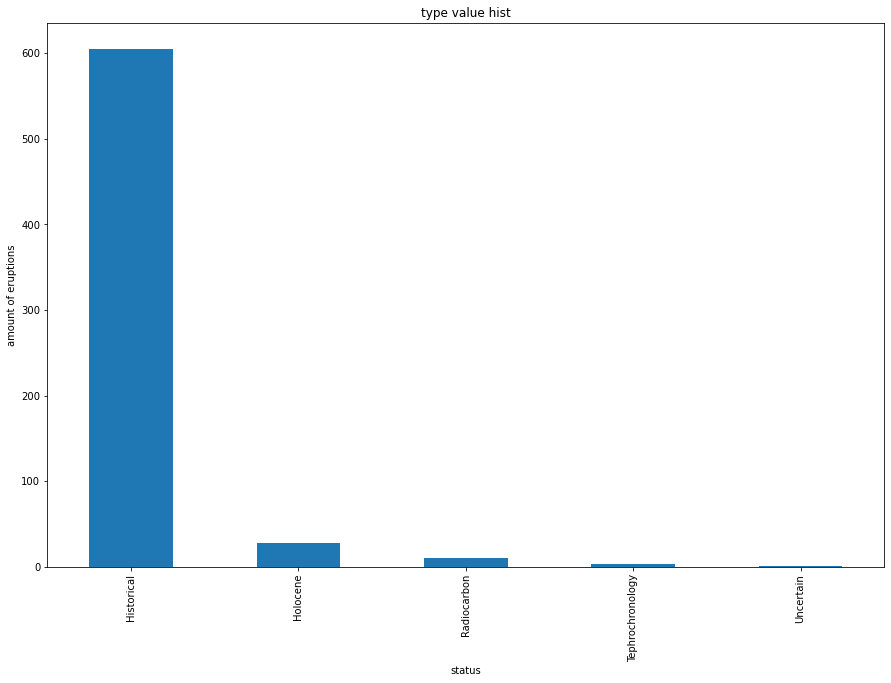

In [20]:
df['status'].value_counts().plot(kind='bar', title='type value hist', xlabel="status", ylabel="amount of eruptions", figsize=(15, 10))

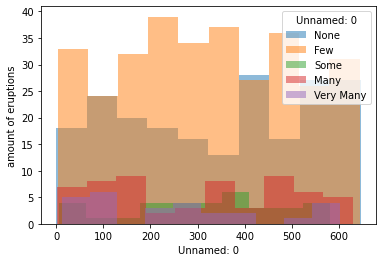

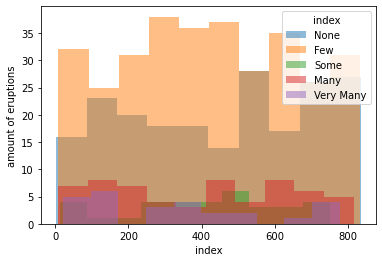

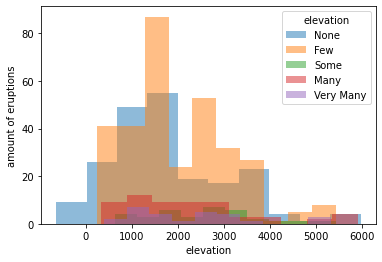

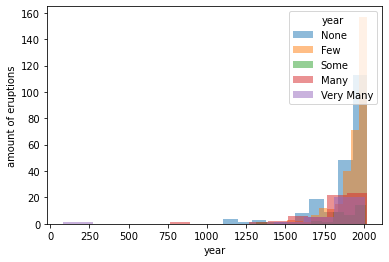

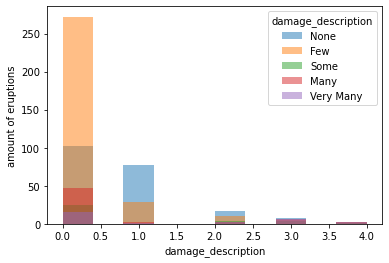

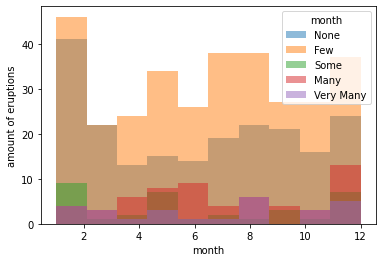

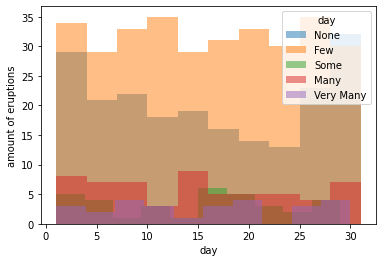

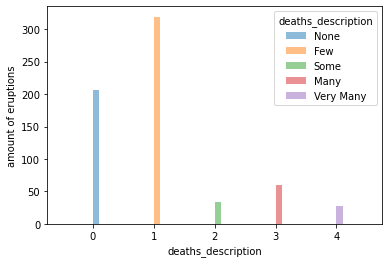

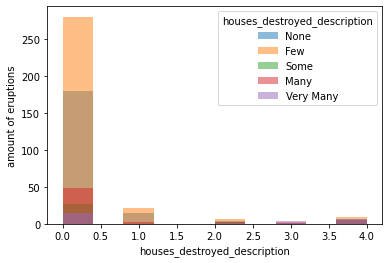

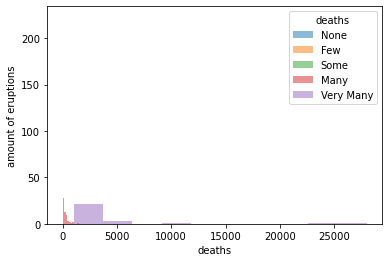

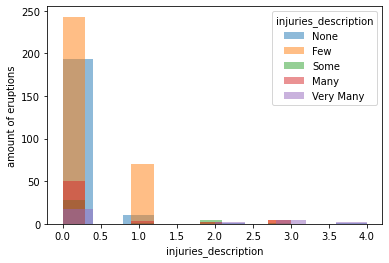

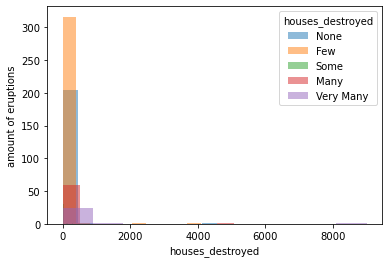

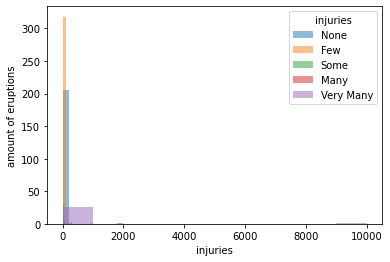

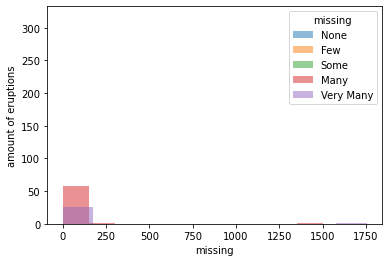

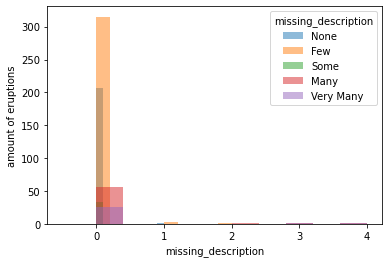

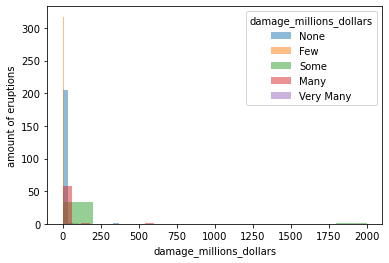

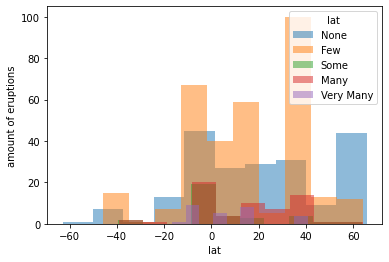

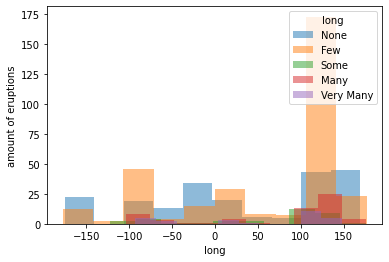

In [21]:
for column_name in list(df.select_dtypes(exclude=['object', 'bool']).columns):
    pyplot.hist(df[df['deaths_description']==0][column_name], alpha=0.5, label='None')
    pyplot.hist(df[df['deaths_description']==1][column_name], alpha=0.5, label='Few')
    pyplot.hist(df[df['deaths_description']==2][column_name], alpha=0.5, label='Some')
    pyplot.hist(df[df['deaths_description']==3][column_name], alpha=0.5, label='Many')
    pyplot.hist(df[df['deaths_description']==4][column_name], alpha=0.5, label='Very Many')
    pyplot.legend(loc='upper right', title = column_name)
    pyplot.xlabel(column_name)
    pyplot.ylabel("amount of eruptions")
    pyplot.show()

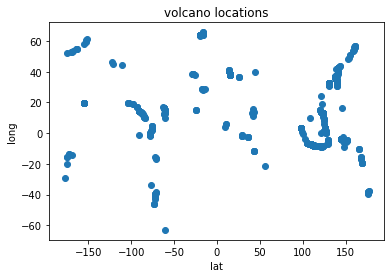

In [22]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(df.long,df.lat)
plt.title("volcano locations")
plt.xlabel("lat")
plt.ylabel("long")
plt.show()

In [23]:
map = folium.Map(location=[0,0], zoom_start=1)
for i in range(0,len(df)):
    folium.Circle(
    location=[str(df['lat'][i]),str(df['long'][i])],
    popup=df['date'][i],
    radius=str(df['deaths_description'][i]*100),
    color='crimson',
    fill=True,
    fill_color='crimson').add_to(map)
map.save('volcanoes_map.html')
map

In [24]:
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, f1_score

In [ ]:
df = pd.read_csv('volcano_data.csv')
df_0 = df[df['deaths_description']==0].reset_index(drop=True)
df_1 = df[(df['deaths_description']==1)].reset_index(drop=True)
df_2 = df[(df['deaths_description']==2)].reset_index(drop=True)
df_3 = df[(df['deaths_description']==3)].reset_index(drop=True)
df_4 = df[(df['deaths_description']==4)].reset_index(drop=True)
df_0['d'] = 0
df_1['d'] = 1
df_2['d'] = 2
df_3['d'] = 3
df_4['d'] = 4
df = pd.concat([df_0, df_1,df_2, df_3, df_4], ignore_index=True).drop(['deaths_description'], axis=1)
X = df[df.columns[(df.columns == 'lat') | (df.columns == 'long')]]
y = df['d']
x_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=40)
scaler = MinMaxScaler(feature_range=(-1,1))
x_train_scaled = scaler.fit_transform(x_train)
model = sklearn.linear_model.LogisticRegression().fit(x_train_scaled, y_train)


scaler.fit(X_test)
lat = float(input("enter Lat: "))
long = float(input("enter Long: "))
c = scaler.transform([[lat, long]])
p = model.predict_proba(c)[0]
if (-90 <=lat <= 90 and -180 <= long <= 180):
    noP, fewP, someP, manyP, veryP = p[0]*100, p[1]*100, p[2]*100, p[3]*100, p[4]*100
    print('Cords ({}, {}):\tno danger probability: {:.2f}%\n\t\t\tlow danger probability: {:.2f}%\n\t\t\tsome danger probability: {:.2f}%\n\t\t\thigh danger probability: {:.2f}%\n\t\t\tvery high danger probability: {:.2f}%\n'.format(lat, long, noP, fewP, someP, manyP, veryP))
else:
    print('Input is out of range!')